In [15]:
import os
from dotenv import load_dotenv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.callbacks import EarlyStopping



In [17]:
current_dir = Path(os.getcwd())
#print(current_dir)
#project_root = os.path.abspath('')

#print(project_root)
project_root = next(p for p in current_dir.resolve().parents if p.name == "cnn_binary")
os.chdir(project_root)
print("Current Working Directory: ", os.getcwd())



Current Working Directory:  /Users/jubacochran/Downloads/cnn_binary


In [18]:
train_images_dir = project_root / os.environ.get("TRAIN_IMAGES_DIR")
val_images_dir = project_root / os.environ.get("VAL_IMAGES_DIR")

#Set up paths
class_images_dir = project_root / os.environ.get("CLASS_TRAIN_IMAGES_DIR", "")
print(class_images_dir)#Just checking
test_images_dir = project_root / os.environ.get("TEST_IMAGES_DIR", "")

train_images_dir = project_root / os.environ.get("TRAIN_IMAGES_DIR", "")
val_images_dir = project_root / os.environ.get("VAL_IMAGES_DIR", "")


model_dir = project_root / os.environ.get("MODEL_DIR", "")


/Users/jubacochran/Downloads/cnn_binary/dataset/train


In [19]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
    verbose=1
)

In [20]:
# Set image dimensions and batch size
batch_size = 128
image_size = (224, 224)

In [21]:
# Grabbing images from diretory
train_dataset, validation_dataset = keras.utils.image_dataset_from_directory(
    class_images_dir,
    label_mode="int",
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,
    seed=42,
    subset="both",
)

Found 500 files belonging to 2 classes.
Using 400 files for training.
Using 100 files for validation.


In [22]:
print(train_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [100]:
#CNN Architecture
#I'll use the normalization here to help the model generalize better.This isn't a deep network but I'm cusious to see how it performs.
model = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters=8, kernel_size=3,activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=16, kernel_size=3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation = 'relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],

)






: 

In [101]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50
)

Epoch 1/50


In [115]:
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 batch_normalization_17 (Ba  (None, 222, 222, 8)       32        
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 16)      1168      
                                                                 
 batch_normalization_18 (Ba  (None, 109, 109, 16)     

: 

: 

: 

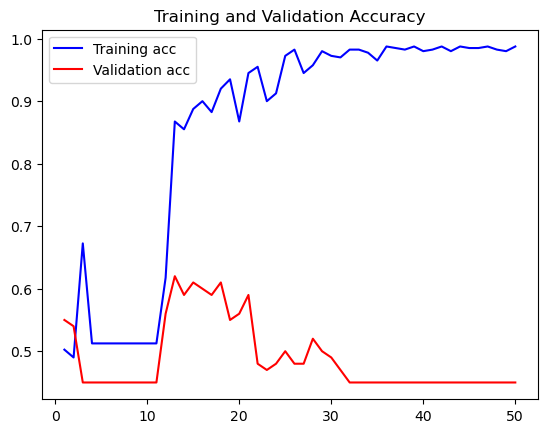

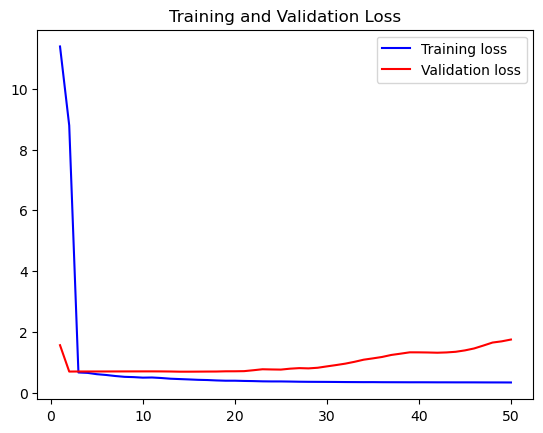

: 

: 

: 

In [116]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



In [117]:

binary_model_name = os.getenv("BINARY_MODEL")

# Construct the model path using `Path`
model_path = model_dir / binary_model_name

# Save the model using the dynamically constructed path
model.save(str(model_path))  # `save()` expects a string, hence `str(model_path)`


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


: 

: 

: 

In [118]:
conv_base = keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
)
#Freeze the weights of the convolutional base
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

: 

: 

: 

In [119]:
inputs = keras.Input(shape=(224,224,3))

x = conv_base(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs,outputs)



: 

: 

: 

In [120]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(train_dataset,
                     validation_data=validation_dataset,
                     epochs=50,
                     callbacks=[early_stopping])


Epoch 1/50
2/2 [==============================] - 18s 9s/step - loss: 1.9793 - accuracy: 0.5375 - val_loss: 1.3497 - val_accuracy: 0.6600
Epoch 2/50
2/2 [==============================] - 17s 8s/step - loss: 1.4598 - accuracy: 0.5925 - val_loss: 1.0812 - val_accuracy: 0.6700
Epoch 3/50
2/2 [==============================] - 17s 8s/step - loss: 1.1975 - accuracy: 0.6375 - val_loss: 0.9373 - val_accuracy: 0.6900
Epoch 4/50
2/2 [==============================] - 19s 9s/step - loss: 1.0624 - accuracy: 0.6600 - val_loss: 0.8421 - val_accuracy: 0.7500
Epoch 5/50
2/2 [==============================] - 19s 9s/step - loss: 0.9316 - accuracy: 0.6900 - val_loss: 0.7389 - val_accuracy: 0.7800
Epoch 6/50
2/2 [==============================] - 17s 8s/step - loss: 0.7974 - accuracy: 0.7100 - val_loss: 0.6292 - val_accuracy: 0.8000
Epoch 7/50
2/2 [==============================] - 16s 8s/step - loss: 0.6699 - accuracy: 0.7400 - val_loss: 0.5271 - val_accuracy: 0.8200
Epoch 8/50
2/2 [==================

: 

: 

: 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 1)                 513       
                                                                 
Total params: 14715201 (56.13 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


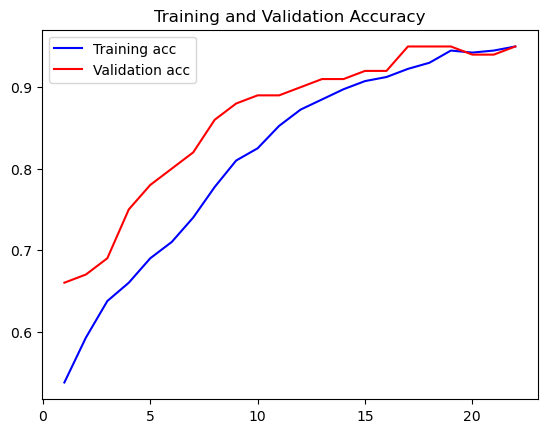

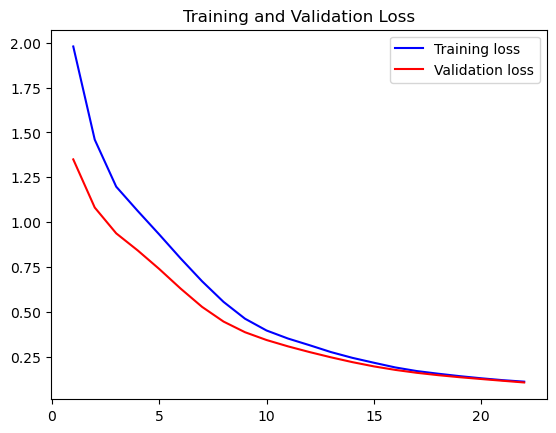

: 

: 

: 

In [121]:
model.summary()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [122]:
#Unfreeze the base model to squeeze the last bit of performance out.
conv_base.trainable = True

#since changes were made to the model, I'll need to recomplile it
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'],
)

history3= model.fit(train_dataset,
                     validation_data=validation_dataset,
                     epochs=50,
                     callbacks=[early_stopping])







Epoch 1/50
2/2 [==============================] - 48s 19s/step - loss: 0.1348 - accuracy: 0.9350 - val_loss: 0.0754 - val_accuracy: 0.9500
Epoch 2/50
2/2 [==============================] - 47s 19s/step - loss: 0.0348 - accuracy: 0.9925 - val_loss: 0.0273 - val_accuracy: 0.9900
Epoch 3/50
2/2 [==============================] - 48s 19s/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 48s 19s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 47s 19s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 47s 19s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 47s 19s/step - loss: 5.8084e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 8/50
2/2 [=======

: 

: 

: 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 1)                 513       
                                                                 
Total params: 14715201 (56.13 MB)
Trainable params: 14715201 (56.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


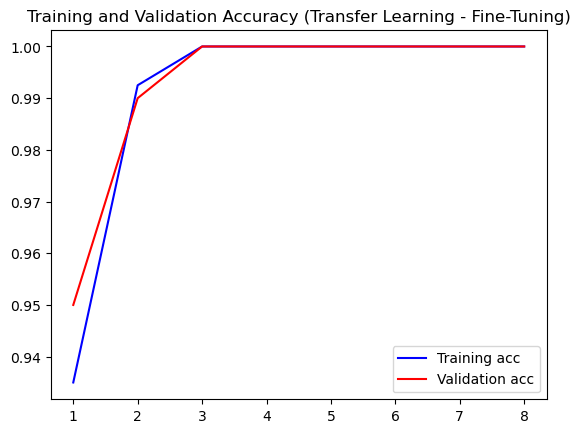

: 

: 

: 

In [123]:
model.summary()


# Visualize the fine-tuning history
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy (Transfer Learning - Fine-Tuning)')
plt.legend()
plt.show()


In [124]:
test_dataset = keras.utils.image_dataset_from_directory(
    test_images_dir,
    labels=None,  #Unseen data no labes, randomly distributed images between classes
    batch_size=32,
    image_size=(224, 224),
    shuffle=False  # Do not shuffle, to keep image order for consistent results
)

Found 72 files belonging to 1 classes.


: 

: 

: 

In [125]:
predictions = model.predict(test_dataset)

# Display the images with their predictions
class_names = ["Class 0", "Class 1"]  # Define your class names for binary classification


3/3 [==============================] - 2s 613ms/step


: 

: 

: 

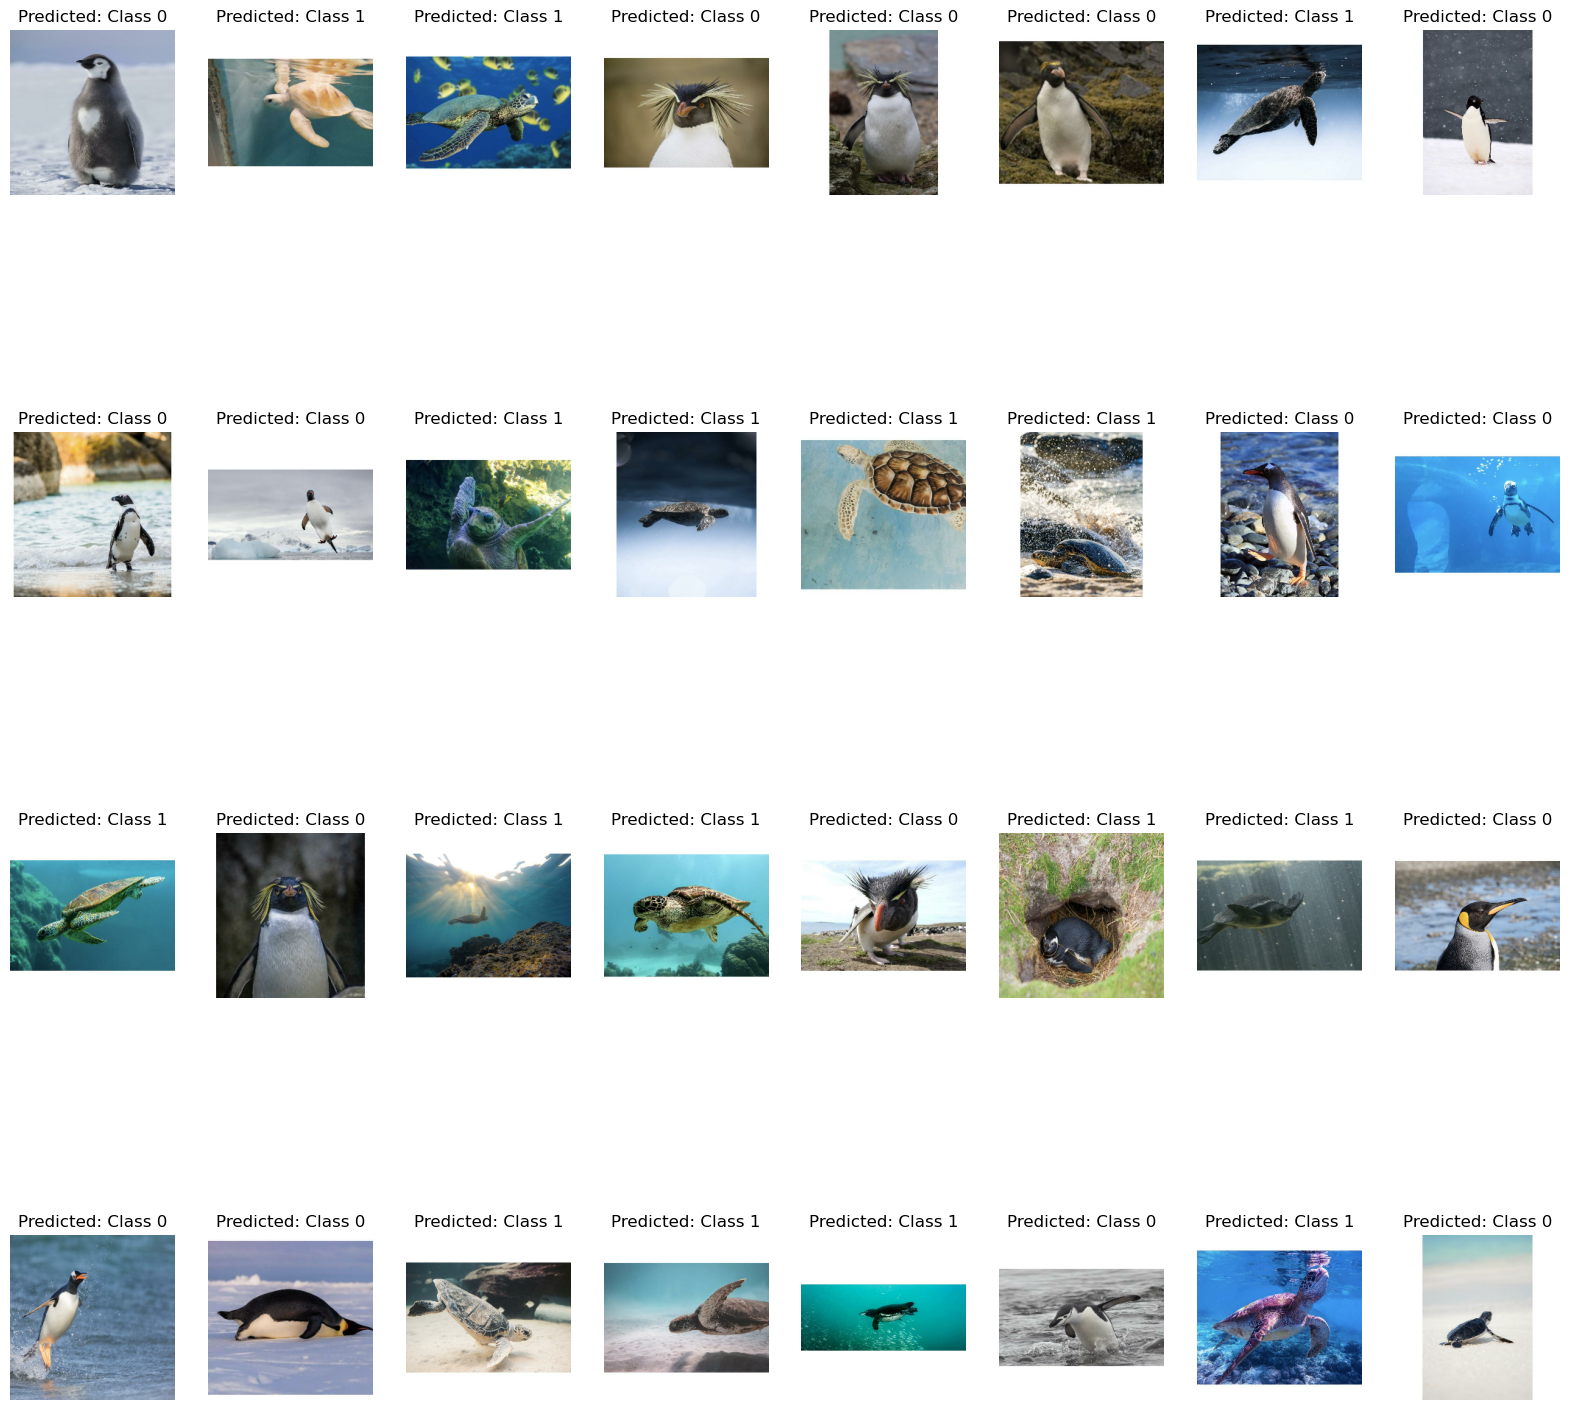

: 

: 

: 

In [126]:
# Convert predictions to class labels (binary classification)
predicted_classes = [1 if pred > 0.5 else 0 for pred in predictions]

# Plotting images with their predicted labels
plt.figure(figsize=(20, 20))
for images in test_dataset.take(1):
    for i in range(len(images)):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[predicted_classes[i]]}")
        plt.axis("off")
plt.show()